# Convex Hull 


The Convex Hull is a fundamental concept in computational geometry. It refers to the smallest convex polygon that encloses a given set of points in a two-dimensional plane. In simpler terms, it is the outer boundary that wraps around a set of points, forming a shape with no indentations or concave angles.

To visualize this, imagine you have a set of points scattered on a piece of paper. The Convex Hull would be the shape you could draw by stretching a rubber band around the outermost points, making sure it encloses all the other points within it.

In [1]:
%pip install matplotlib
%pip install numpy


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


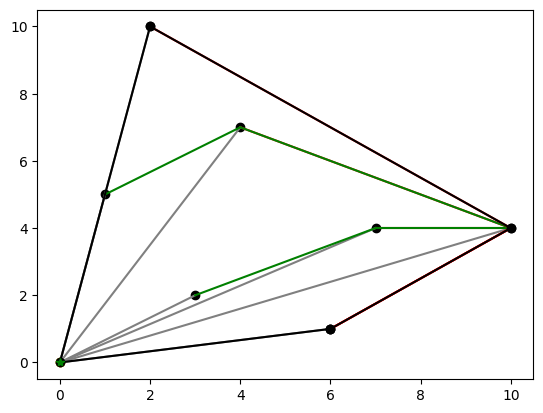

In [8]:
import math
from random import uniform
from collections import namedtuple
from typing import List
from matplotlib import pyplot as plt

Point = namedtuple("Point", "x y")
n = 20


def generate_random_points(n) -> List[Point]:
    random_points: List[Point] = n * [None]
    for i in range(n):
        x = round(uniform(0, 10), 3)
        y = round(uniform(0, 10), 3)
        p = Point(x, y)
        random_points[i] = p

    print(random_points)
    return random_points


def is_counter_clockwise(a: Point, b: Point, c: Point) -> bool:
    prod = (b.x - a.x) * (c.y - a.y) - (b.y - a.y) * (c.x - a.x)
    if prod > 0:
        # plot the line in red if it is counter clockwise in a new plot
        plt.plot([a.x, b.x], [a.y, b.y], color='red')
        return True
    else:
        # plot the line in green if it is clockwise in a new plot
        plt.plot([a.x, b.x], [a.y, b.y], color='green')
        return False


def polar_angle(point: Point, start_point: Point):
    dx = point.x - start_point.x
    dy = point.y - start_point.y
    # plot the angle 
    plt.plot([start_point.x, point.x], [start_point.y, point.y], color='gray')
    return math.atan2(dy, dx)


def convex_hull(sorted_points) -> list[Point]:
    result = [sorted_points[0], sorted_points[1]]
    for i in range(2, len(sorted_points)):
        while len(result) >= 2:
            if is_counter_clockwise(result[-2], result[-1], sorted_points[i]):
                break
            result.pop()
        result.append(sorted_points[i])
    result.append(sorted_points[0])
    return result


def plot_points(points: List[Point], start_point: Point = None):
    x_coords = [p.x for p in points]
    y_coords = [p.y for p in points]

    plt.scatter(x_coords, y_coords, color='black')
    if start_point:
        plt.scatter(start_point.x, start_point.y, color='gold')


def plot_hull(hull: List[Point], start_point: Point):
    x_coords = [p.x for p in hull]
    y_coords = [p.y for p in hull]
    plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='black')
    plt.plot(start_point.x, start_point.y, 'g*')


if __name__ == '__main__':
    # the points are 0,0 1,5 2,10 3,2 4,7 6,1 7,4 10,4
    points = [Point(0, 0), Point(1, 5), Point(2, 10), Point(3, 2), Point(4, 7), Point(6, 1), Point(7, 4), Point(10, 4)]
    start_point = min(points, key=lambda p: p.y)
    sorted_points = sorted(points, key=lambda p: polar_angle(start_point, p))

    hull = convex_hull(sorted_points)

    plot_points(points, start_point)
    plot_hull(hull, start_point)
    plt.show()

    